<span style="color:black;font-weight:700;font-size:32px"> 
               Построение моделей машинного обучения для фермерского хозяйства "Вольный луг" 
</span>

<span style="color:black;font-weight:700;font-size:22px"> 
              Описание проекта
</span>

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе.

Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

<span style="color:black;font-weight:700;font-size:22px"> 
              Необходимо:
</span>
Подход к решению задачи:

1) Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».

2) Нужно собрать данные по клиентам по следующим группам:

- Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
- Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
- Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
- Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

В ходе работы нужно:
1) Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
2) В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
3) Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

<span style="color:black;font-weight:700;font-size:22px"> 
              План работы
 </span>
 
1) Загрузка данных

2) Предобработка данных

3) Исследовательский анализ данных

4) Объединение датасетов

5) Корреляционный анализ

6) Построение пайплайнов моделей машинного обучения (KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression(), SVC().)

7) Анализ важности признаков. 

8) Сегментация покупателей.

9) Общий вывод

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from phik import phik_matrix
from phik.report import plot_correlation_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import (OneHotEncoder, OrdinalEncoder, StandardScaler, 
                                   MinMaxScaler, MaxAbsScaler, OrdinalEncoder,
                                  RobustScaler)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
# from optuna import distributions
# from optuna.integration import OptunaSearchCV


# Загрузка данных


In [2]:
try:
    market_file_df = pd.read_csv('/datasets/market_file.csv', index_col='id')
except:
    market_file_df = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv', index_col='id')

In [3]:
try:
    market_money_df = pd.read_csv('/datasets/market_money.csv', index_col='id')
except:
    market_money_df = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv', index_col='id')

In [4]:
try:
    market_time_df = pd.read_csv('/datasets/market_time.csv', index_col='id')
except:
    market_time_df = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv', index_col='id')

In [5]:
try:
    money_df = pd.read_csv('/datasets/money.csv',sep=';', index_col='id')
except:
    money_df = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv',sep=';', index_col='id')

In [6]:
market_file_df.head()

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
id,,,,,,,,,,,,
215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [7]:
market_money_df.head()

,Период,Выручка
id,,
215348,препредыдущий_месяц,0.0
215348,текущий_месяц,3293.1
215348,предыдущий_месяц,0.0
215349,препредыдущий_месяц,4472.0
215349,текущий_месяц,4971.6


In [8]:
market_time_df.head()

,Период,минут
id,,
215348,текущий_месяц,14
215348,предыдцщий_месяц,13
215349,текущий_месяц,10
215349,предыдцщий_месяц,12
215350,текущий_месяц,13


In [9]:
money_df.head()

,Прибыль
id,
215348,"0,98"
215349,"4,16"
215350,"3,13"
215351,"4,87"
215352,"4,21"


In [10]:
market_file_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 215348 to 216647
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Покупательская активность            1300 non-null   object 
 1   Тип сервиса                          1300 non-null   object 
 2   Разрешить сообщать                   1300 non-null   object 
 3   Маркет_актив_6_мес                   1300 non-null   float64
 4   Маркет_актив_тек_мес                 1300 non-null   int64  
 5   Длительность                         1300 non-null   int64  
 6   Акционные_покупки                    1300 non-null   float64
 7   Популярная_категория                 1300 non-null   object 
 8   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 9   Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 10  Ошибка_сервиса                       1300 non-null   int64  
 11  Страниц_за_визит       

In [11]:
market_money_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3900 entries, 215348 to 216647
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Период   3900 non-null   object 
 1   Выручка  3900 non-null   float64
dtypes: float64(1), object(1)
memory usage: 91.4+ KB


In [12]:
market_time_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2600 entries, 215348 to 216647
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Период  2600 non-null   object
 1   минут   2600 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 60.9+ KB


In [13]:
money_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 215348 to 216647
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Прибыль  1300 non-null   object
dtypes: object(1)
memory usage: 20.3+ KB


<span style="color:black;font-weight:700;font-size:16px"> 
             Вывод
</span>

Датасет market_file_df содержит в себе 1300 записей и 12 признаков. Датасет не содержит пропусков данных.

Датасет market_money_df содержит в себе 3900 записей и 2 признака. Датасет не содержит пропусков данных.

Датасет market_time_df содержит 2600 записей и 2 признака. Датасет не содержит пропусков данных.

Датасет money_df содержит 1300 записей и 2 признака. Датасет не содержит пропусков данных.


# Предобработка данных

На этапе предобработки данных, обработаем пропуски и дубликаты в данных, приведем к единому формату записи в столцах, а также пребразуем типы данных

## Обработка датасета market_file_df

In [14]:
market_file_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 215348 to 216647
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Покупательская активность            1300 non-null   object 
 1   Тип сервиса                          1300 non-null   object 
 2   Разрешить сообщать                   1300 non-null   object 
 3   Маркет_актив_6_мес                   1300 non-null   float64
 4   Маркет_актив_тек_мес                 1300 non-null   int64  
 5   Длительность                         1300 non-null   int64  
 6   Акционные_покупки                    1300 non-null   float64
 7   Популярная_категория                 1300 non-null   object 
 8   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 9   Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 10  Ошибка_сервиса                       1300 non-null   int64  
 11  Страниц_за_визит       

In [15]:
market_file_df.head(10)

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
id,,,,,,,,,,,,
215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
215353,Снизилась,стандартт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
215354,Снизилась,стандартт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2
215355,Снизилась,стандартт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4
215356,Снизилась,стандартт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3


In [16]:
market_file_df['Тип сервиса'].value_counts()

стандарт     914
премиум      376
стандартт     10
Name: Тип сервиса, dtype: int64

In [17]:
market_file_df['Тип сервиса'] = market_file_df['Тип сервиса'].replace('стандартт', 'стандарт')

In [18]:
market_file_df['Покупательская активность'].value_counts()

Прежний уровень    802
Снизилась          498
Name: Покупательская активность, dtype: int64

In [19]:
market_file_df['Популярная_категория'].value_counts()

Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: Популярная_категория, dtype: int64

Обработали неявные дубликаты в категориальных признаках

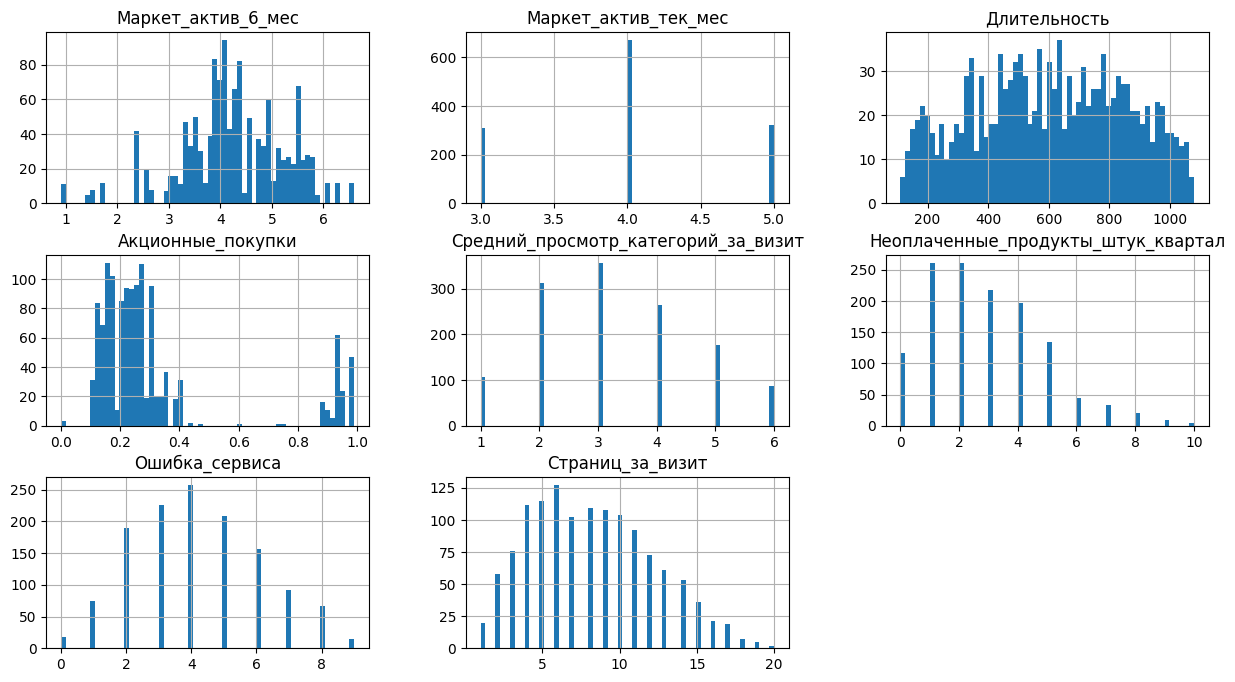

In [20]:
market_file_df.hist(bins=60, figsize=(15,8));

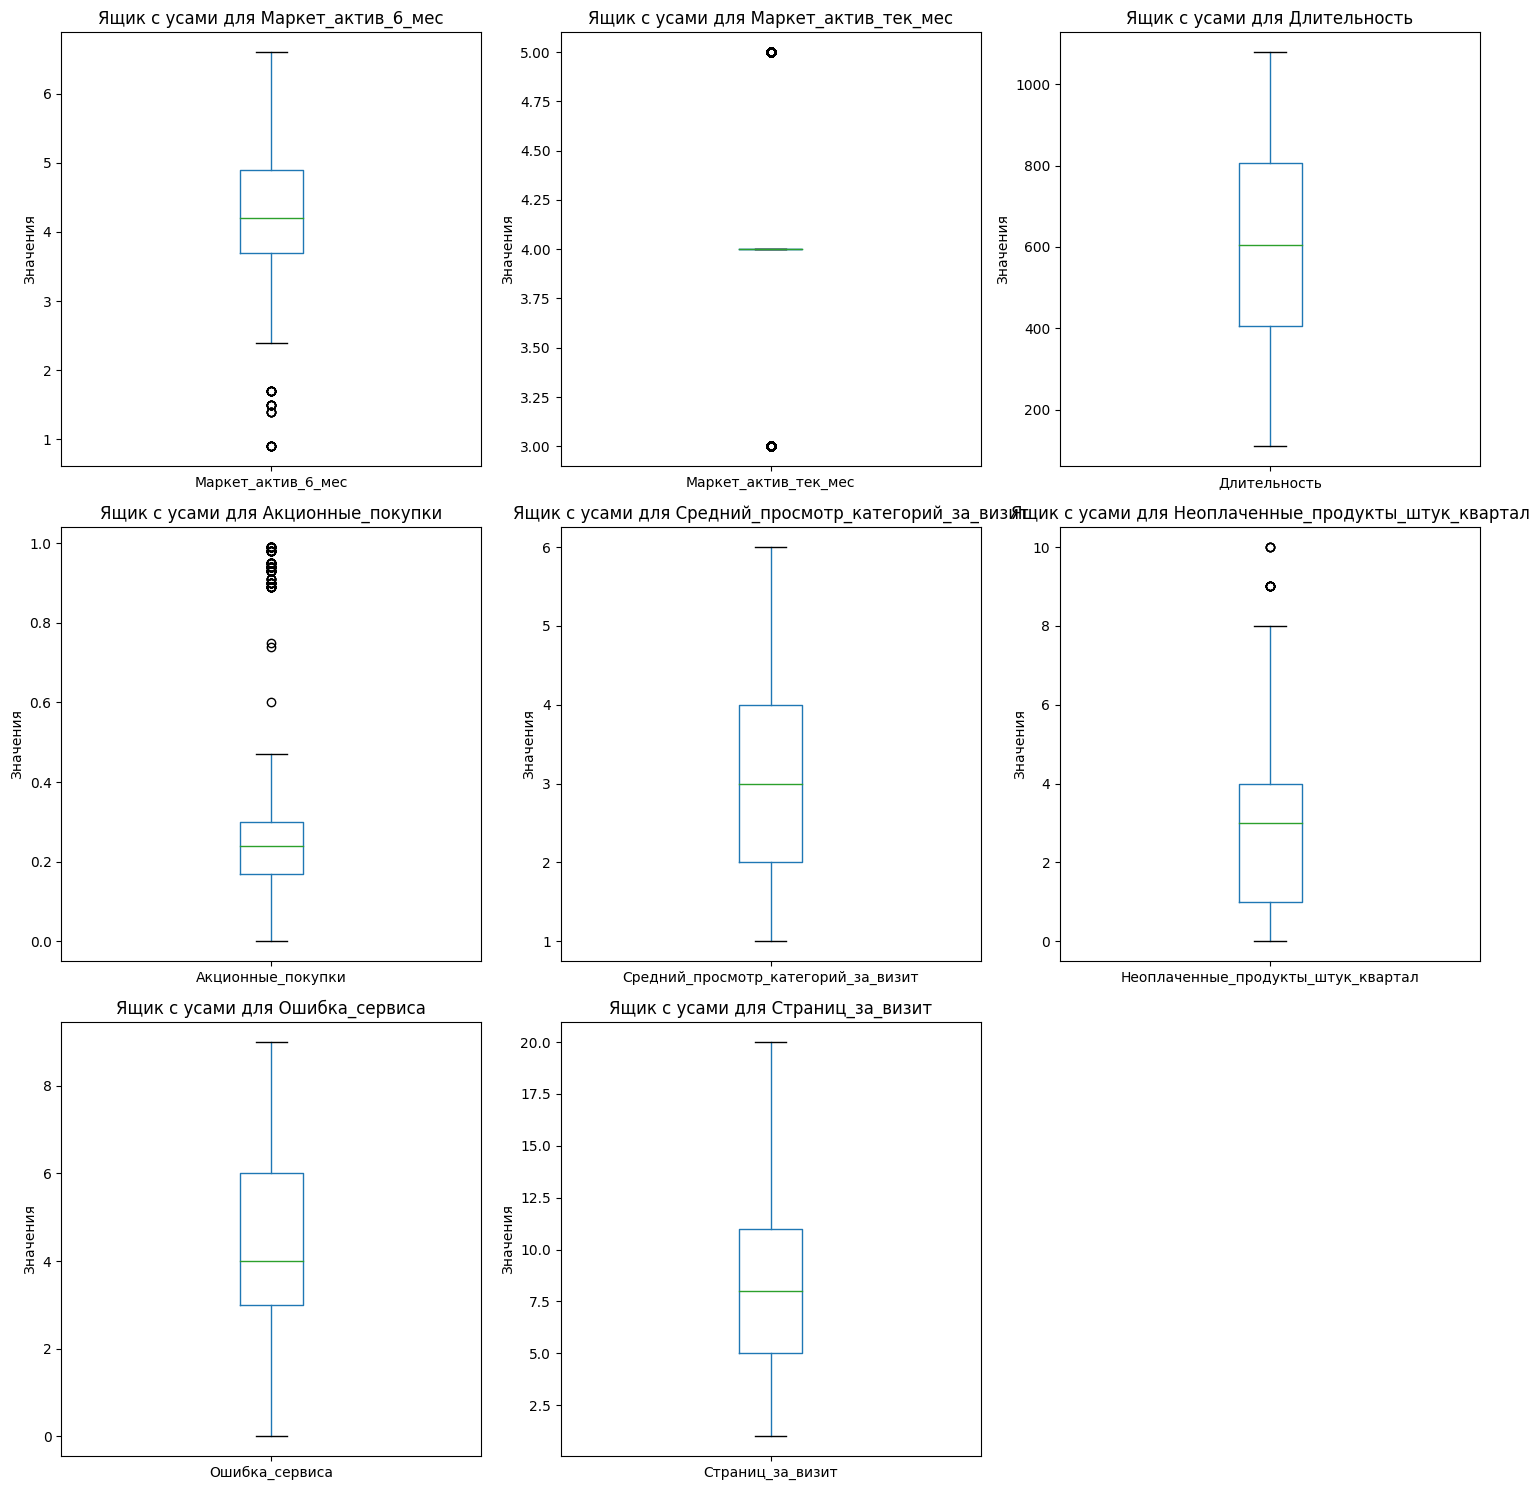

In [21]:
numeric_columns = market_file_df.select_dtypes(include=['number'])
columns = numeric_columns.columns

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    numeric_columns.boxplot(column=column, ax=ax)
    ax.set_title(f'Ящик с усами для {column}')
    ax.set_ylabel('Значения')
    ax.grid(False)

for i in range(len(columns), 9):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


Выбросов в данных не наблюдается


## Обработка market_money_df 

In [22]:
market_money_df.head()

,Период,Выручка
id,,
215348,препредыдущий_месяц,0.0
215348,текущий_месяц,3293.1
215348,предыдущий_месяц,0.0
215349,препредыдущий_месяц,4472.0
215349,текущий_месяц,4971.6


In [23]:
market_money_df['Период'].value_counts()

препредыдущий_месяц    1300
текущий_месяц          1300
предыдущий_месяц       1300
Name: Период, dtype: int64

array([[<Axes: title={'center': 'Выручка'}>]], dtype=object)

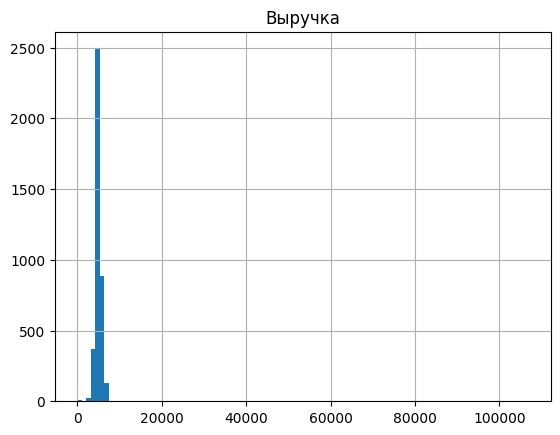

In [24]:
market_money_df.hist(bins=100)

<Axes: ylabel='Выручка'>

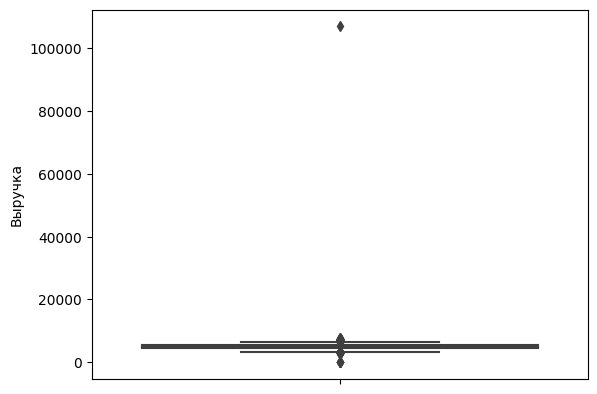

In [25]:
sns.boxplot(y=market_money_df['Выручка'],data=market_money_df,fliersize=5)

Определим индекс выброса и удалим во всех датасетах, пользователя с этим индексом


In [26]:
index_to_delete = market_money_df[market_money_df['Выручка'] > 10000].index
market_money_df = market_money_df.drop(index=index_to_delete)
market_file_df = market_file_df.drop(index=index_to_delete)
market_time_df = market_time_df.drop(index=index_to_delete)
money_df = money_df.drop(index=index_to_delete)

<Axes: ylabel='Выручка'>

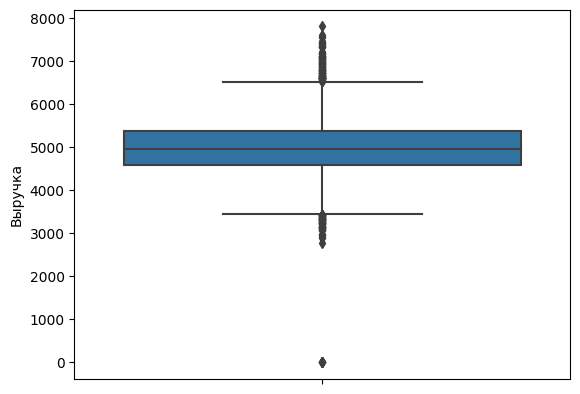

In [27]:
sns.boxplot(y=market_money_df['Выручка'],data=market_money_df,fliersize=5)

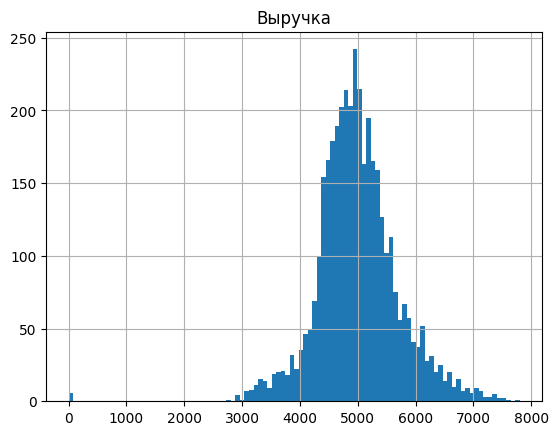

In [28]:
market_money_df.hist(bins=100);

## Обработка market_time_df

In [29]:
market_time_df.head()

,Период,минут
id,,
215348,текущий_месяц,14
215348,предыдцщий_месяц,13
215349,текущий_месяц,10
215349,предыдцщий_месяц,12
215350,текущий_месяц,13


In [30]:
market_time_df['Период'].value_counts()

текущий_месяц       1299
предыдцщий_месяц    1299
Name: Период, dtype: int64

In [31]:
market_time_df['Период'] = market_time_df['Период'].replace('предыдцщий_месяц','предыдущий_месяц')

array([[<Axes: title={'center': 'минут'}>]], dtype=object)

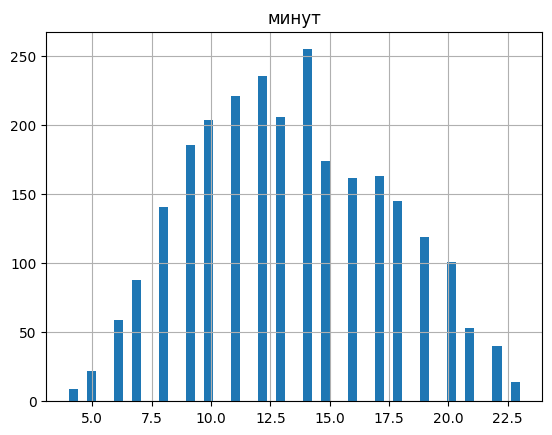

In [32]:
market_time_df.hist(bins=50)

## Обработка money_df

In [33]:
money_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 215348 to 216647
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Прибыль  1299 non-null   object
dtypes: object(1)
memory usage: 20.3+ KB


In [34]:
money_df.head()

,Прибыль
id,
215348,"0,98"
215349,"4,16"
215350,"3,13"
215351,"4,87"
215352,"4,21"


In [35]:
money_df['Прибыль'] = (money_df['Прибыль'].apply(lambda x: float(x.replace(',','.'))) * 1000).astype('int')


Очевидно, что прибыль указана в тысячах, преобразуем этот столбец и умножим его на 1000, чтобы он показывал прибыль в рублях. 

In [36]:
money_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 215348 to 216647
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Прибыль  1299 non-null   int32
dtypes: int32(1)
memory usage: 15.2 KB


In [37]:
money_df.head()

,Прибыль
id,
215348,980
215349,4160
215350,3130
215351,4870
215352,4210


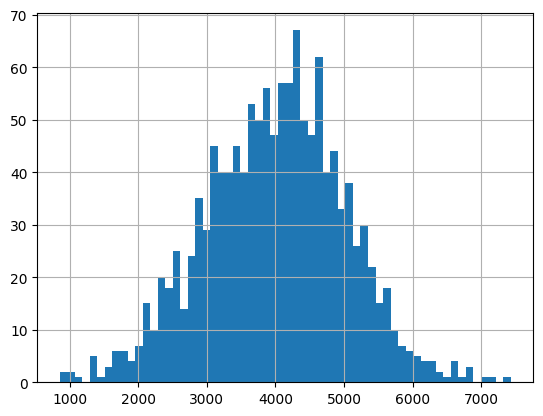

In [38]:
money_df['Прибыль'].hist(bins=60);

<span style="color:black;font-weight:700;font-size:16px"> 
             Вывод
</span>

В ходе предобработки данных, были обработаны датасеты. В них были обработаны неявные дубликаты в строковых столбцах, удалены выбросы и соответствующие индексы для других датасетов, также где это необходимо были преобразованы типы данных

# Исследовательский анализ данных

## Анализ market_file_df

Проведите исследовательский анализ данных из каждой таблицы. Отберите клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. Оформите выводы по результатам шага.

In [39]:
market_file_df.head()

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
id,,,,,,,,,,,,
215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [40]:
market_file_df.describe()

,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,4.255735,4.011547,601.871440,0.319330,3.270208,2.840647,4.185527,8.177829
std,1.012725,0.697136,249.950617,0.249345,1.355852,1.972073,1.956044,3.979524
min,0.900000,3.000000,110.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,3.700000,4.000000,405.000000,0.170000,2.000000,1.000000,3.000000,5.000000
50%,4.200000,4.000000,606.000000,0.240000,3.000000,3.000000,4.000000,8.000000
75%,4.900000,4.000000,806.000000,0.300000,4.000000,4.000000,6.000000,11.000000
max,6.600000,5.000000,1079.000000,0.990000,6.000000,10.000000,9.000000,20.000000


In [41]:
market_file_df.describe(include='object')

,Покупательская активность,Тип сервиса,Разрешить сообщать,Популярная_категория
count,1299,1299,1299,1299
unique,2,2,2,6
top,Прежний уровень,стандарт,да,Товары для детей
freq,802,924,962,330


In [42]:
def plot_pie_for_feature(df, column):
    fig, ax = plt.subplots(figsize=(12,7))
    colors=['lightgreen', 'yellow', 'red', 'skyblue', 'orange', 'blue']
    column_values_counts = df[column].value_counts()
    column_values_counts.plot(kind='pie', ax = ax, colors= colors, autopct='%1.1f%%')
    plt.title(column)    

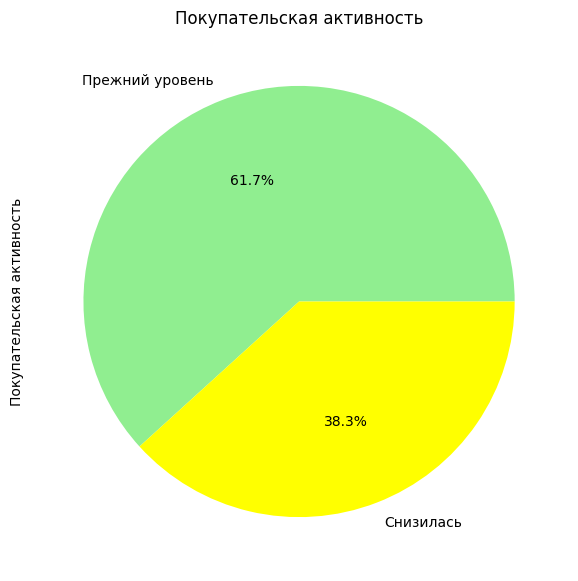

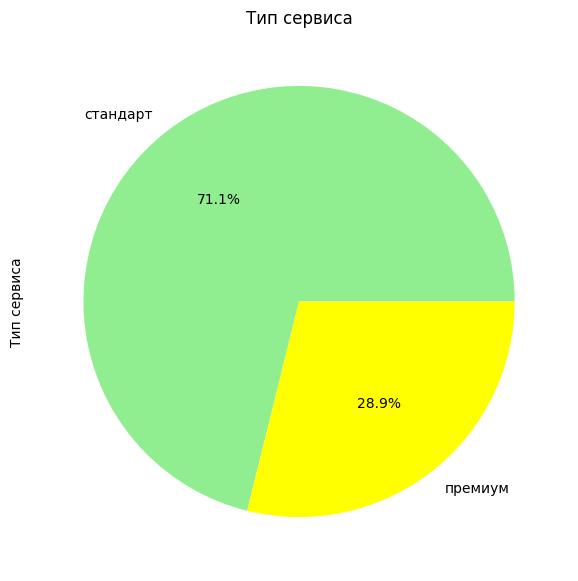

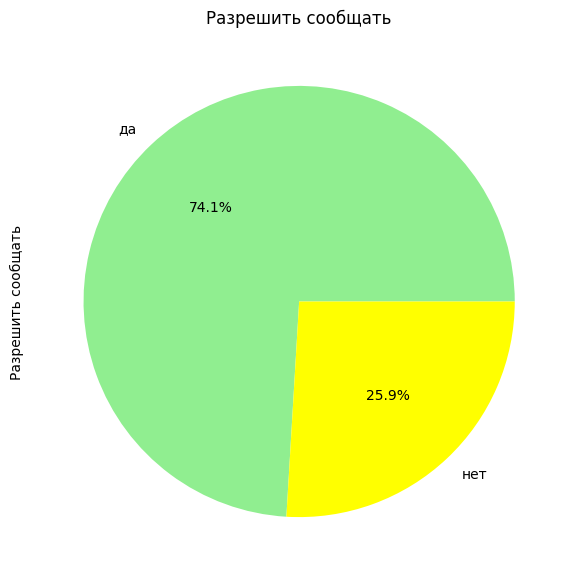

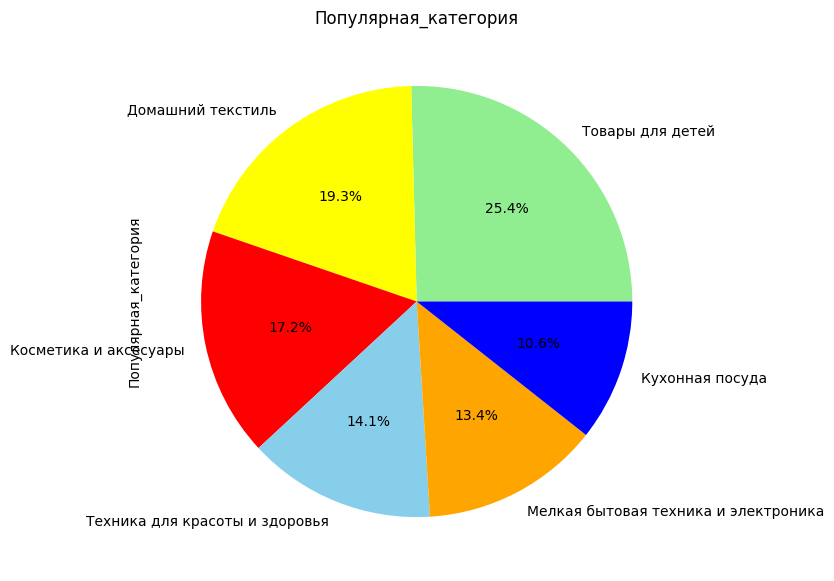

In [43]:
for col in ['Покупательская активность', "Тип сервиса", "Разрешить сообщать" ,"Популярная_категория"]:
    plot_pie_for_feature(market_file_df, col)

In [44]:
market_file_df.pivot_table(index=['Покупательская активность', 'Тип сервиса'],
                          values=['Разрешить сообщать', 'Маркет_актив_6_мес','Маркет_актив_тек_мес',
                                  'Страниц_за_визит', 'Ошибка_сервиса', 'Акционные_покупки'],
                          aggfunc={'Разрешить сообщать': 'count', 'Маркет_актив_6_мес': np.mean,
                                   'Маркет_актив_тек_мес': np.mean, 'Страниц_за_визит': np.mean,
                                   'Ошибка_сервиса': np.mean, 'Акционные_покупки': np.mean})\
                                  .rename(columns={'Разрешить сообщать':'Пок. актив-ть\ Тип сер-са кол-во'})

Акционные_покупки  Маркет_актив_6_мес  \
Покупательская активность Тип сервиса                                          
Прежний уровень           премиум               0.229320            4.520874   
                          стандарт              0.241493            4.587081   
Снизилась                 премиум               0.462130            3.636686   
                          стандарт              0.443720            3.806098   

                                       Маркет_актив_тек_мес  Ошибка_сервиса  \
Покупательская активность Тип сервиса                                         
Прежний уровень           премиум                  3.898058        4.305825   
                          стандарт                 4.050336        4.345638   
Снизилась                 премиум                  3.976331        4.213018   
                          стандарт                 4.030488        3.804878   

                                       Пок. актив-ть\ Тип сер-са кол-во  \
Покупательская активность Тип сервиса                                     
Прежний уровень           премиум                                   206   
                          стандарт                                  596   
Снизилась                 премиум                                   169   
                          стандарт                                  328   

                                       Страниц_за_визит  
Покупательская активность Тип сервиса                    
Прежний уровень           премиум             10.558252  
                          стандарт             9.533557  
Снизилась                 премиум              5.573964  
                          стандарт             5.560976

Как можно заметить из сводной таблицы для тех клиентов, чей уровень покупательской активности остался на прежнем уровне маркетинговая активность для них была выше, чем для тех, чья активность снизилась(соответственно, можно сказать, что маркетинговая активность  приносит свою пользу, и клиенты чаще оставляют покупательскую активность на прежнем уровне).

Также можно отметить, тот факт ,что компания в текущем месяцк проводит активную маркетинговую компанию для пользователей с подпиской типа "стандарт".

Также можно отметить, что покупатели чья активность осталась на прежнем уровне, в среднем посещают больше страниц за визит.

Также можно отметить, что ошибки сервиса не почти не влияют на снижение покупательской активности так как среднее количество ошибок почти одинаковое.

Исходя из таблицы можно заметить, что не смотря на высокую долю акционных покупок за последний 6 месяцев, покупательная активность таких клиентов снижается, это может говорить о том, что 1) компании нужно пересмотреть акционную политику, или 2) подбирать акции исходя из предпочтений клиента. 


!!! Также важно отметить, что для целевого признака наблюдается дисбаланс классов, будем учитывать это при построении моделей машинного обучения.

## Анализ market_money_df

In [45]:
market_money_df.head(10)

,Период,Выручка
id,,
215348,препредыдущий_месяц,0.0
215348,текущий_месяц,3293.1
215348,предыдущий_месяц,0.0
215349,препредыдущий_месяц,4472.0
215349,текущий_месяц,4971.6
215349,предыдущий_месяц,5216.0
215350,препредыдущий_месяц,4826.0
215350,текущий_месяц,5058.4
215350,предыдущий_месяц,5457.5


In [46]:
market_money_df.pivot_table(index='Период',
                           values='Выручка',
                           aggfunc=np.sum)

,Выручка
Период,
предыдущий_месяц,6411919.5
препредыдущий_месяц,6267718.0
текущий_месяц,6802586.9


In [47]:
non_null_revenue_id = market_money_df.groupby('id').filter(lambda x: (x['Выручка'] != 0.0).all())
non_null_revenue_id_list=non_null_revenue_id.index.unique().to_list()


В non_null_revenue_id содержится список клиентов с покупательской активностью три месяца, т.е те , которые что-то покупали в этот период.

In [48]:
market_money_df[market_money_df['Выручка'] == 0]

,Период,Выручка
id,,
215348,препредыдущий_месяц,0.0
215348,предыдущий_месяц,0.0
215357,препредыдущий_месяц,0.0
215357,предыдущий_месяц,0.0
215359,предыдущий_месяц,0.0
215359,препредыдущий_месяц,0.0


Клиенты с id = 215348, 215357, 215359 совершали покупки только в текущем месяце


## Анализ market_time_df

In [49]:
market_time_df

,Период,минут
id,,
215348,текущий_месяц,14
215348,предыдущий_месяц,13
215349,текущий_месяц,10
215349,предыдущий_месяц,12
215350,текущий_месяц,13
...,...,...
216645,текущий_месяц,18
216646,предыдущий_месяц,18
216646,текущий_месяц,7


In [50]:
market_time_df.pivot_table(index='Период', values='минут', aggfunc=np.mean)

,минут
Период,
предыдущий_месяц,13.468822
текущий_месяц,13.204003


Среднее значение времени проведенного на сайте в текущем и предыдущем месяце примерно одинаковы


## Анализ money_df

In [51]:
money_df.head()

,Прибыль
id,
215348,980
215349,4160
215350,3130
215351,4870
215352,4210


<span style="color:black;font-weight:700;font-size:16px"> 
             Вывод
</span>

Как можно заметить из сводной таблицы для тех клиентов, чей уровень покупательской активности остался на прежнем уровне маркетинговая активность для них была выше, чем для тех, чья активность снизилась(соответственно, можно сказать, что маркетинговая активность  приносит свою пользу, и клиенты чаще оставляют покупательскую активность на прежнем уровне).

Также можно отметить, тот факт ,что компания в текущем месяцк проводит активную маркетинговую компанию для пользователей с подпиской типа "стандарт".

Также можно отметить, что покупатели чья активность осталась на прежнем уровне, в среднем посещают больше страниц за визит.

Также можно отметить, что ошибки сервиса не почти не влияют на снижение покупательской активности так как среднее количество ошибок почти одинаковое.

Исходя из таблицы можно заметить, что не смотря на высокую долю акционных покупок за последний 6 месяцев, покупательная активность таких клиентов снижается, это может говорить о том, что 1) компании нужно пересмотреть акционную политику, или 2) подбирать акции исходя из предпочтений клиента. 

Клиенты с id = 215348, 215357, 215359 совершали покупки только в текущем месяце. Все остальные клиенты имели активность во все три месяца.
Среднее значение времени проведенного на сайте в текущем и предыдущем месяце примерно одинаковы

# Объединение датасетов

In [52]:
market_file_df.head()

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
id,,,,,,,,,,,,
215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [53]:
market_money_df.head()

,Период,Выручка
id,,
215348,препредыдущий_месяц,0.0
215348,текущий_месяц,3293.1
215348,предыдущий_месяц,0.0
215349,препредыдущий_месяц,4472.0
215349,текущий_месяц,4971.6


In [54]:
market_time_df.head()

,Период,минут
id,,
215348,текущий_месяц,14
215348,предыдущий_месяц,13
215349,текущий_месяц,10
215349,предыдущий_месяц,12
215350,текущий_месяц,13


In [55]:
full_df = market_file_df.copy()

Учитывая, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделаем отдельный столбец для каждого периода. Для этого сформируем отдельные датасеты по выручке и времени, с разделением на периоды (препредыдущий_месяц, предыдущий_месяц, текущий_месяц)

In [56]:
prepred_rev = pd.DataFrame(market_money_df[market_money_df['Период'] == 'препредыдущий_месяц']['Выручка'])\
                .rename(columns={'Выручка': 'выручка_препред_месяц'})

pred_rev = pd.DataFrame(market_money_df[market_money_df['Период'] == 'предыдущий_месяц']['Выручка'])\
                .rename(columns={'Выручка': 'выручка_пред_месяц'})

tek_rev = pd.DataFrame(market_money_df[market_money_df['Период'] == 'текущий_месяц']['Выручка'])\
                .rename(columns={'Выручка': 'выручка_текущ_месяц'})

pred_time = pd.DataFrame(market_time_df[market_time_df['Период'] == 'предыдущий_месяц']['минут'])\
              .rename(columns={'минут': 'время_пред_месяц'})

tek_time = pd.DataFrame(market_time_df[market_time_df['Период'] == 'текущий_месяц']['минут'])\
              .rename(columns={'минут': 'время_текущ_месяц'})

In [57]:
full_df = full_df.join(prepred_rev, on='id').join(pred_rev, on='id').join(tek_rev, on='id')\
                 .join(pred_time, on='id').join(tek_time, on='id')


In [58]:
full_df.head(10)

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_препред_месяц,выручка_пред_месяц,выручка_текущ_месяц,время_пред_месяц,время_текущ_месяц
id,,,,,,,,,,,,,,,,,
215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,0.0,0.0,3293.1,13,14
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,5216.0,4971.6,12,10
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6158.0,6610.4,11,13
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5807.5,5872.5,8,11
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5,10,10
215354,Снизилась,стандарт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2,4503.0,5685.0,5869.6,11,12
215355,Снизилась,стандарт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4,4749.0,3263.0,3772.6,12,10
215356,Снизилась,стандарт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3,4433.0,4146.5,4566.4,6,7


In [59]:
full_df.shape

(1299, 17)

<span style="color:black;font-weight:700;font-size:16px"> 
             Вывод
</span>
Объединили датасете market_file_df, market_money_df, market_time_df. В результате получили датасет с 1299 записями(одна запись была удалена на этапе обработки выбросов)

# Корреляционный анализ

Для анализа корреляции между признаками используем библиотеку phik 

In [60]:
phik_correlation = phik_matrix(full_df)

interval columns not set, guessing: ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'выручка_препред_месяц', 'выручка_пред_месяц', 'выручка_текущ_месяц', 'время_пред_месяц', 'время_текущ_месяц']


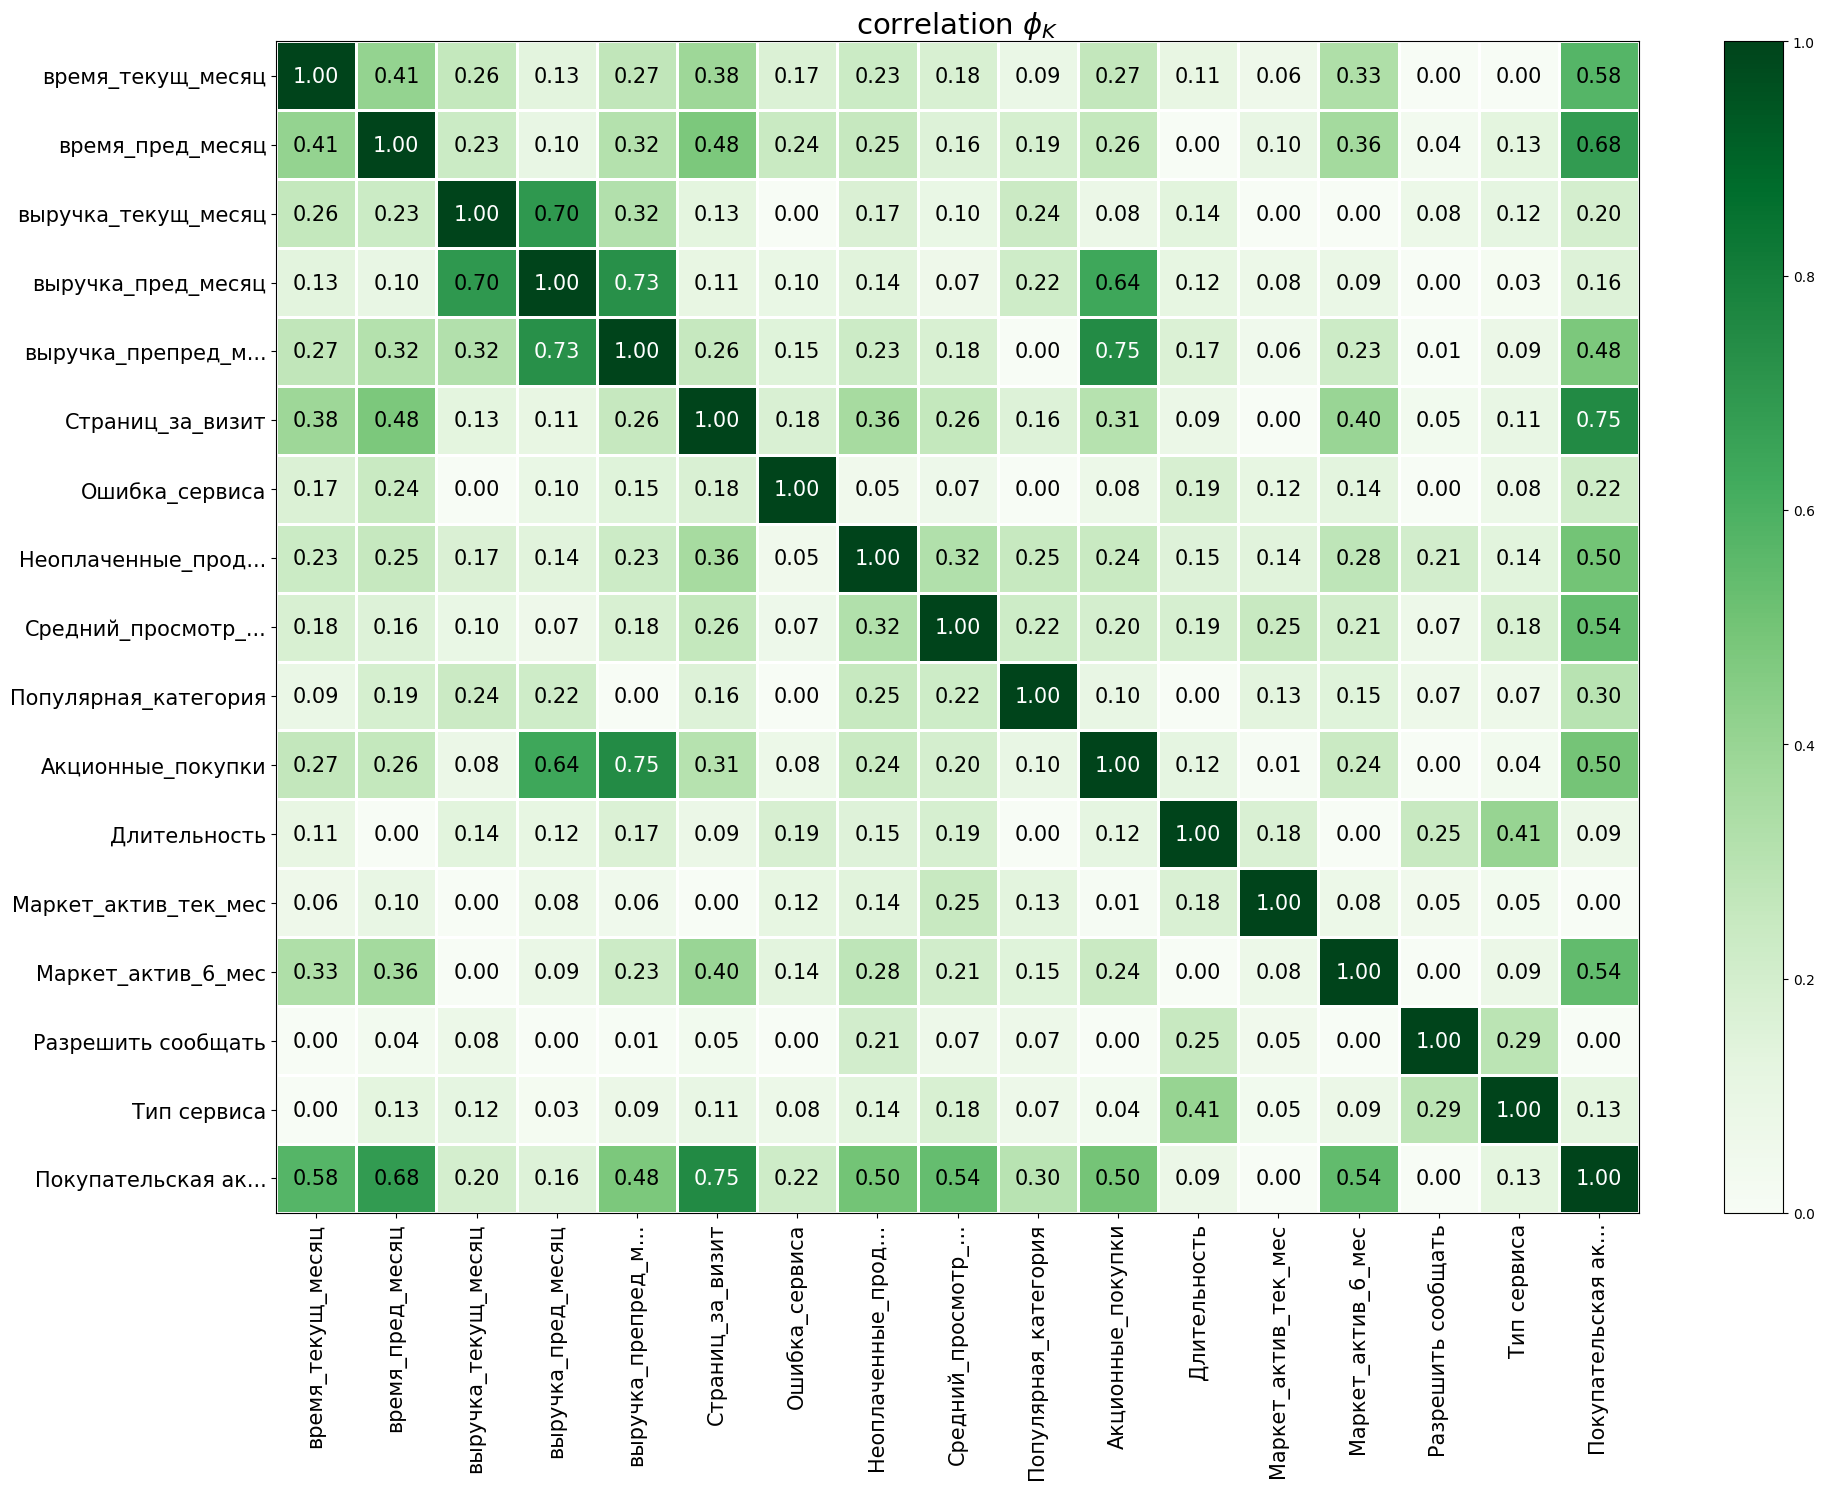

In [61]:
plot_correlation_matrix(
    phik_correlation.values,
    x_labels=phik_correlation.columns,
    y_labels=phik_correlation.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

Явной мультиколлиниарности относительно целевого признака не наблюдается. Анализуруя таблицу корреляций можно отметить, что целевой признак не зависит от признаков "маркет_актив_тек_мес", "разрешить сообщать", и почти не зависит от параметра "длительность" (время прошедшее с момента регистрации). От этих признаков можно избавиться в дальнейшем анализе.


In [62]:
columns_to_delete = ['Длительность', 'Маркет_актив_тек_мес', 'Разрешить сообщать']
full_df = full_df.drop(columns=columns_to_delete, axis=1)

In [63]:
full_df.head()

,Покупательская активность,Тип сервиса,Маркет_актив_6_мес,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_препред_месяц,выручка_пред_месяц,выручка_текущ_месяц,время_пред_месяц,время_текущ_месяц
id,,,,,,,,,,,,,,
215348,Снизилась,премиум,3.4,0.00,Товары для детей,6,2,1,5,0.0,0.0,3293.1,13,14
215349,Снизилась,премиум,4.4,0.75,Товары для детей,4,4,2,5,4472.0,5216.0,4971.6,12,10
215350,Снизилась,стандарт,4.9,0.14,Домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13
215351,Снизилась,стандарт,3.2,0.99,Товары для детей,5,0,6,4,4793.0,6158.0,6610.4,11,13
215352,Снизилась,стандарт,5.1,0.94,Товары для детей,3,2,3,2,4594.0,5807.5,5872.5,8,11


<span style="color:black;font-weight:700;font-size:16px"> 
             Вывод
</span>


Явной мультиколлиниарности относительно целевого признака не наблюдается. Анализуруя таблицу корреляций можно отметить, что целевой признак не зависит от признаков "маркет_актив_тек_мес", "разрешить сообщать", и почти не зависит от параметра "длительность" (время прошедшее с момента регистрации). От этих признаков можно избавиться в дальнейшем анализе.

# Использование пайплайнов для построения моделей МО

In [66]:
target = full_df['Покупательская активность']
full_df = full_df.drop(columns=['Покупательская активность'], axis=1)

In [71]:
ohe_columns = full_df.select_dtypes(include='object').columns
num_columns = full_df.select_dtypes(exclude='object').columns
print(ohe_columns);
print()
print(num_columns)

Index(['Тип сервиса', 'Популярная_категория'], dtype='object')

Index(['Маркет_актив_6_мес', 'Акционные_покупки',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит', 'выручка_препред_месяц', 'выручка_пред_месяц',
       'выручка_текущ_месяц', 'время_пред_месяц', 'время_текущ_месяц'],
      dtype='object')


In [ ]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

X_train, X_test, y_train, y_test = train_test_split(full_df,
                                                   target,
                                                   test_size=TEST_SIZE,
                                                   random_state=RANDOM_STATE,
                                                   stratify=y)


ohe_pipeline = Pipeline(
                    [
                        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
                    ])

data_preprocessor = ColumnTransformer(
                    [('ohe', ohe_pipeline, ohe_columns),
                     ('num', MinMaxScaler(), num_columns)],
                      remainder='passthrough'
                                    )

final_pipeline = Pipeline(
                            [('preprocessor', data_preprocessor),
                             ('models', KNeighborsClassifier()])

param_grid = [
    
                    # Параметры для KNN
    
            {
              'models': [KNeighborsClassifier()],
              'models__n_neighbors': range(2,15),
              'preprocessor__num': [MinMaxScaler(), StandardScaler(), RobustScaler(), 'passthrough']
            
            },
    
                    # Параметры для DecisionTree
            {'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
             'models__max_depth': range(2,6),
             'models__min_samples_leaf': range(2,6),
             'models__min_samples_split': range(2,6),
             'models__max_features': range(2,6),
             'preprocessor__num': [MinMaxScaler(), StandardScaler(), RobustScaler(), 'passthrough']
            },
            
    
]